# Problem definition

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.


# Data

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/

# Features

Education ~
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction ~ 
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement ~ 
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction ~
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating ~
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction ~ 
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'



# Evaluation

Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

In [81]:
# Libraries for EDA
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv("train.csv")
df.head().T # Transposing to allow all the features visible

,0,1,2,3,4
id,0,1,2,3,4
Age,36,35,32,38,50
BusinessTravel,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely
DailyRate,599,921,718,1488,1017
Department,Research & Development,Sales,Sales,Research & Development,Research & Development
DistanceFromHome,24,8,26,2,5
Education,3,3,3,3,4
EducationField,Medical,Other,Marketing,Medical,Medical
EmployeeCount,1,1,1,1,1
EnvironmentSatisfaction,4,1,3,3,2


In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1677.0,838.000000,484.252517,0.0,419.0,838.0,1257.0,1676.0
Age,1677.0,36.036971,8.507112,18.0,30.0,35.0,41.0,60.0
DailyRate,1677.0,892.749553,374.496259,107.0,589.0,890.0,1223.0,3921.0
DistanceFromHome,1677.0,8.683959,7.826143,1.0,2.0,7.0,12.0,29.0
Education,1677.0,2.937984,1.039078,1.0,2.0,3.0,4.0,15.0
EmployeeCount,1677.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
EnvironmentSatisfaction,1677.0,2.757901,1.086835,1.0,2.0,3.0,4.0,4.0
HourlyRate,1677.0,67.798450,19.435928,30.0,51.0,69.0,84.0,100.0
JobInvolvement,1677.0,2.782349,0.650664,1.0,2.0,3.0,3.0,4.0
JobLevel,1677.0,1.998807,1.083065,1.0,1.0,2.0,2.0,7.0


In [84]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

##### The data is basically composed of both strings(texts) and integers(numbers)

In [85]:
df.shape

(1677, 35)

In [86]:
df.isna().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

### EDA(Exploratory analysis of the various columns)

Purpose is to review columns and learn how they affect attrition

In [87]:
df_temp = df.copy()
df_temp.columns

Index(['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

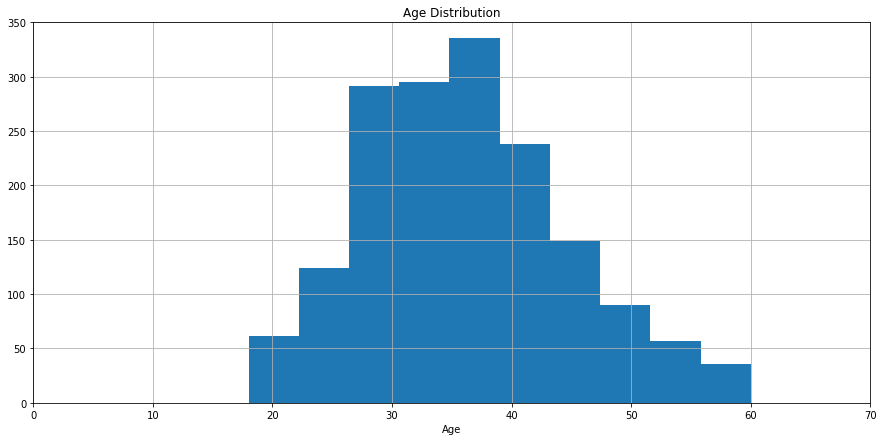

In [88]:
# Age distribution

df_temp['Age'].hist(figsize=(15, 7))
plt.ylim(0,350);
plt.xlabel("Age")
plt.xlim(0,70)
plt.title("Age Distribution");


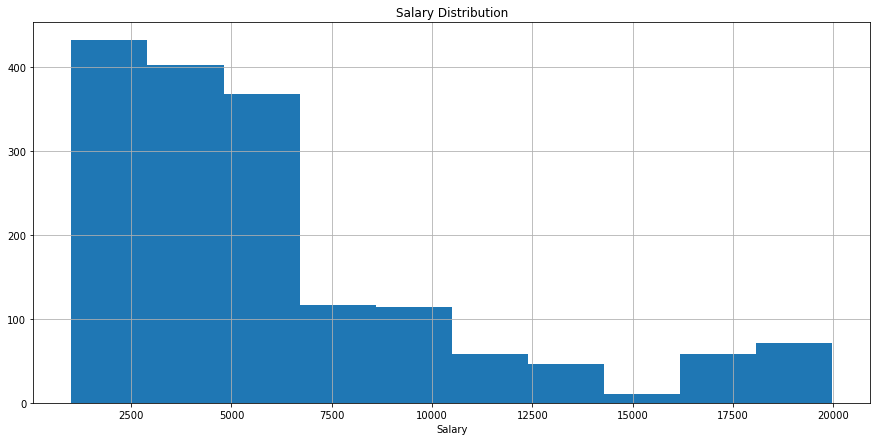

In [89]:
df_temp['MonthlyIncome'].hist(figsize=(15, 7))
#plt.ylim(0,350);
plt.xlabel("Salary")
#plt.xlim(0,70)
plt.title("Salary Distribution");

**1. Salary is skewed to the right**

**2. Few selected employees earn over 15,000**

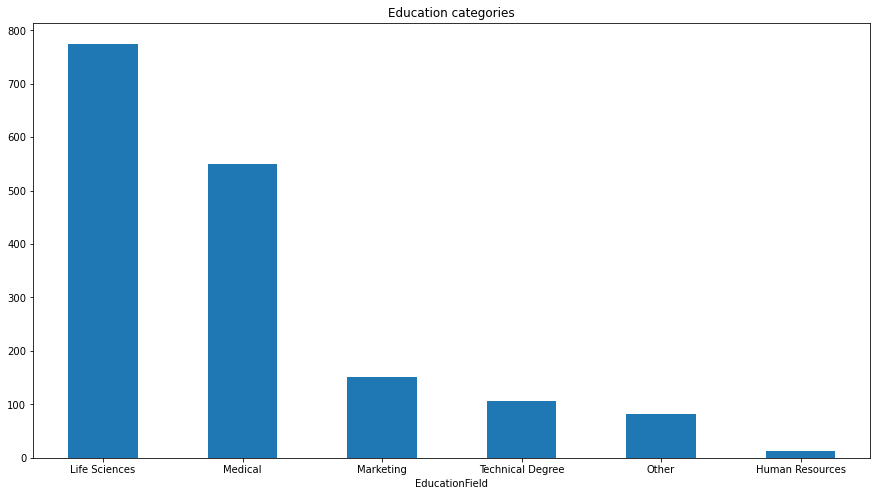

In [90]:
df_temp.EducationField.value_counts().plot(kind='bar',
                                         figsize=(15, 8))
plt.xticks(rotation= 0);
plt.title("Education categories");

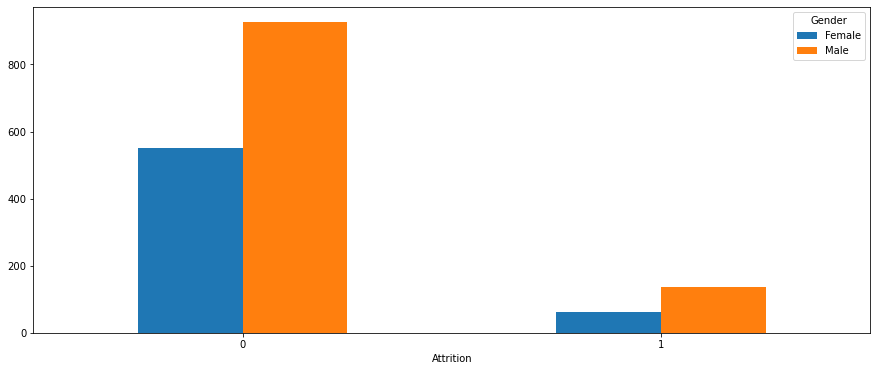

In [91]:
pd.crosstab(df_temp.Attrition, df_temp.Gender).plot(kind='bar', figsize=(15, 6))
plt.xticks(rotation=0);

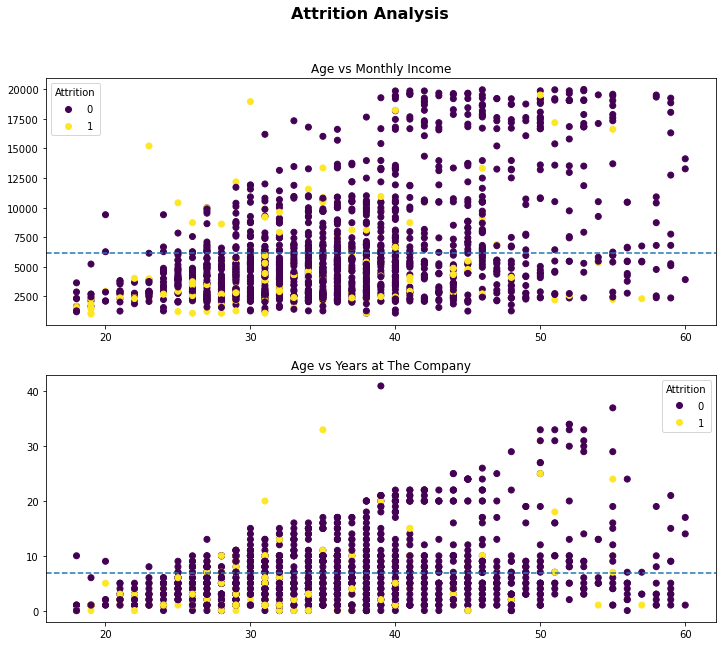

In [122]:
fig, (ax0, ax1) = plt.subplots(nrows=2,
                              figsize = (12, 10))
scatter = ax0.scatter(x=df_temp.Age,
                     y = df_temp["MonthlyIncome"],
                     c=df_temp["Attrition"])
ax0.set(title="Age vs Monthly Income")
ax0.axhline(y= df_temp["MonthlyIncome"].mean(),
           linestyle="--")
ax0.legend(*scatter.legend_elements(), title = "Attrition");
scatter = ax1.scatter(x=df_temp.Age,
                     y = df_temp["YearsAtCompany"],
                     c=df_temp["Attrition"])
ax1.axhline(y= df_temp["YearsAtCompany"].mean(),
           linestyle="--")
ax1.legend(*scatter.legend_elements(), title = "Attrition");
ax1.set(title="Age vs Years at The Company");
fig.suptitle("Attrition Analysis", fontsize= 16, fontweight="bold");
fig.savefig("Attrition analysis")

* On both scatter plots attrition is low among the older persons
* Attrition is not common amongst the persons that have stayed in the company for over 10yrs
* Attrition is not common amongst those that are paid average salary which round 6000

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [94]:
#Splitting data into X and Y
X =df_temp.drop("Attrition",axis=1)
y =df_temp["Attrition"]

len(X), len(y)

(1677, 1677)

In [95]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

# Converting categorical features into numericals

**Machine learning works well with numerical features, there several methods that can be applied to make the conversion and this case we shall apply onehot encoder and column transformer**

In [96]:
categorical_features = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", 
                        "MaritalStatus", "Over18", "OverTime"]
onehot = OneHotEncoder()
transformer = ColumnTransformer([('onehot',
                                 onehot,
                                 categorical_features)],
                               remainder="passthrough")
transformed_x = transformer.fit_transform(X)


In [97]:
X_train, X_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size=0.2)

In [98]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1341, 55), (336, 55), (1341,), (336,))

# Importing the model()

* There are better models that can data can be trained on but in this project will use Logistic regression, Randomforest classifier and Knearest neighbors

In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [100]:
models = {"Neighbors": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "Logistic Regression": LogisticRegression()}


In [101]:
# creating a function to fit and score the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fit - model fits using the train dataset
    Score - Model scores using the test dataset
    """
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [102]:
fit_and_score(models=models,
             X_train=X_train,
             X_test=X_test,
             y_train=y_train,
             y_test=y_test)

{'Neighbors': 0.8601190476190477,
 'Random Forest': 0.8898809523809523,
 'Logistic Regression': 0.8898809523809523}


<img src="machine_learning_mind_map.png" width="700" height="600">

In [103]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8928571428571429

In [104]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [105]:
# Hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV

params_ = {"n_estimators":np.arange(10, 100, 20),
          "max_depth":[None, 0.5, 2.5, 3.5],
          "max_features":['auto', 'sqrt', 'log2']}

clf_random = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                               param_distributions=params_,
                               verbose= True,
                               n_iter = 5)
clf_random.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), n_iter=5,
                   param_distributions={'max_depth': [None, 0.5, 2.5, 3.5],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': array([10, 30, 50, 70, 90])},
                   verbose=True)

In [106]:
clf_random.best_params_

{'n_estimators': 70, 'max_features': 'sqrt', 'max_depth': 2.5}

In [107]:
clf = RandomForestClassifier(n_estimators=30,
                            max_features='auto',
                            max_depth=2.5,
                            random_state=42)

In [108]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8898809523809523

In [109]:
y_preds = clf.predict(X_test)

In [110]:
from sklearn.metrics import f1_score, classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       299
           1       0.00      0.00      0.00        37

    accuracy                           0.89       336
   macro avg       0.44      0.50      0.47       336
weighted avg       0.79      0.89      0.84       336



In [111]:
from sklearn.metrics import plot_roc_curve

y_probs = clf.predict_proba(X_test)

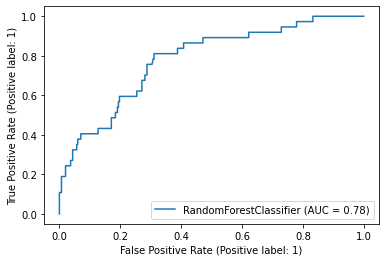

In [112]:
plot_roc_curve(clf, X_test, y_test);

In [113]:
# Importing the test data for prediction
test_set = pd.read_csv("test.csv")
test_set.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1677,19,Non-Travel,992,Research & Development,1,1,Medical,1,4,...,4,80,0,1,2,2,1,0,0,0
1,1678,45,Travel_Rarely,1136,Sales,4,4,Marketing,1,3,...,3,80,1,7,3,3,2,2,2,2
2,1679,37,Travel_Rarely,155,Research & Development,13,3,Life Sciences,1,4,...,2,80,2,13,2,2,7,7,1,7
3,1680,32,Travel_Rarely,688,Research & Development,1,4,Life Sciences,1,3,...,3,80,0,14,2,2,14,10,11,8
4,1681,29,Travel_Frequently,464,Research & Development,9,1,Life Sciences,1,3,...,1,80,0,1,5,3,1,0,0,0


In [114]:
categorical_features = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", 
                        "MaritalStatus", "Over18", "OverTime"]
onehot = OneHotEncoder()
transformer = ColumnTransformer([('onehot',
                                 onehot,
                                 categorical_features)],
                               remainder="passthrough")
transformed_test = transformer.fit_transform(test_set)

In [115]:
pd.DataFrame(transformed_test)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,4.0,80.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,3.0,80.0,1.0,7.0,3.0,3.0,2.0,2.0,2.0,2.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,2.0,80.0,2.0,13.0,2.0,2.0,7.0,7.0,1.0,7.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3.0,80.0,0.0,14.0,2.0,2.0,14.0,10.0,11.0,8.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,80.0,0.0,1.0,5.0,3.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3.0,80.0,1.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0
1115,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,4.0,80.0,1.0,20.0,4.0,3.0,20.0,10.0,1.0,8.0
1116,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,80.0,1.0,10.0,2.0,2.0,5.0,3.0,0.0,2.0
1117,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4.0,80.0,1.0,5.0,2.0,3.0,4.0,2.0,1.0,3.0


In [116]:
predicted_scores = clf.predict(transformed_test)

In [117]:
predicted_scores = pd.DataFrame()

In [119]:
predicted_scores["Id"] = test_set.id
predicted_scores["Prediction"] =clf.predict(transformed_test)
predicted_scores.head()

,Id,Prediction
0,1677,0
1,1678,0
2,1679,0
3,1680,0
4,1681,0
